In [4]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

import tensorflow as tf

### Data and Input

In [11]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width ,channels = dataset.shape
print(height, width)

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

427 640


### Filters

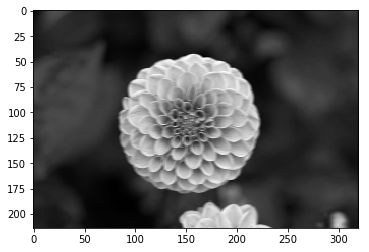

In [9]:
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[1, :, :, 1], cmap="gray")
plt.show()

### Pooling Layers

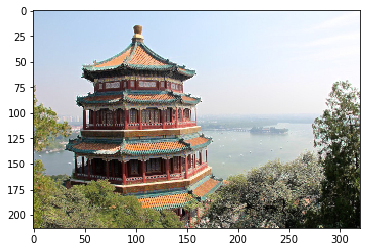

In [10]:
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

### CNN Architectures